## Exploratoy Data Analysis

NOTE: Before concating the dataframes, it is necessary to add a timeleft category to completed sales.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import plotly.plotly as py
import re
%matplotlib inline

In [74]:
active_sales = pd.read_csv('./cleaned_csv_3_1', index_col=0)
completed_sales = pd.read_csv('./cleaned_completed_3_4', index_col=0)

In [75]:
#adding timeLeft column to completed sales, with 0 value
completed_sales['timeLeft'] = pd.Timedelta(0)

In [76]:
#fixing time deltas
deltas = []
for val in active_sales['timeLeft']:
    time = val[:-10]
    deltas.append(pd.Timedelta(time))

active_sales['timeLeft'] = deltas

In [77]:
#merged dataframe
df = pd.concat([active_sales, completed_sales], axis=0).reset_index(drop=True)

In [78]:
df.shape

(14900, 29)

In [79]:
#Converting to datetime 
df['startTime'] = pd.to_datetime(df['startTime'])
df['endTime'] = pd.to_datetime(df['endTime'])

In [80]:
df.columns

Index(['URLTitle', 'autoPay', 'bestOfferEnabled', 'bidCount',
       'buyItNowAvailable', 'buyItNowPrice', 'categoryId', 'country',
       'currencyid_conv', 'current_currency', 'current_price', 'endTime',
       'expeditedShipping', 'handlingTime', 'itemId', 'listingType',
       'location', 'paymentMethod', 'postalCode', 'productId',
       'returnsNotAccepted', 'shippingType', 'shipping_cost', 'startTime',
       'timeLeft', 'title', 'topRatedListing', 'value_conv', 'watchCount'],
      dtype='object')

In [81]:
#Removing 143 duplicate entries
print(df.loc[df.duplicated()].shape)
df = df.drop_duplicates()

(143, 29)


In [82]:
#3036 of the 14900 sales are auctions 
df.loc[df['listingType'] =='Auction'].shape

(3036, 29)

Text(0.5,0,'Number of Bids in Auctions')

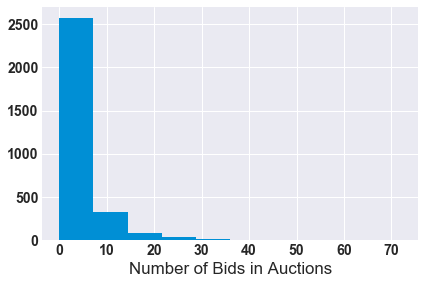

In [83]:
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
df.loc[df['listingType'] =='Auction']['bidCount'].hist()
plt.xlabel('Number of Bids in Auctions')

Number of Auctions by Listing Type 
 StoreInventory    10145
Auction            3036
FixedPrice         1425
AuctionWithBIN      151
Name: listingType, dtype: int64


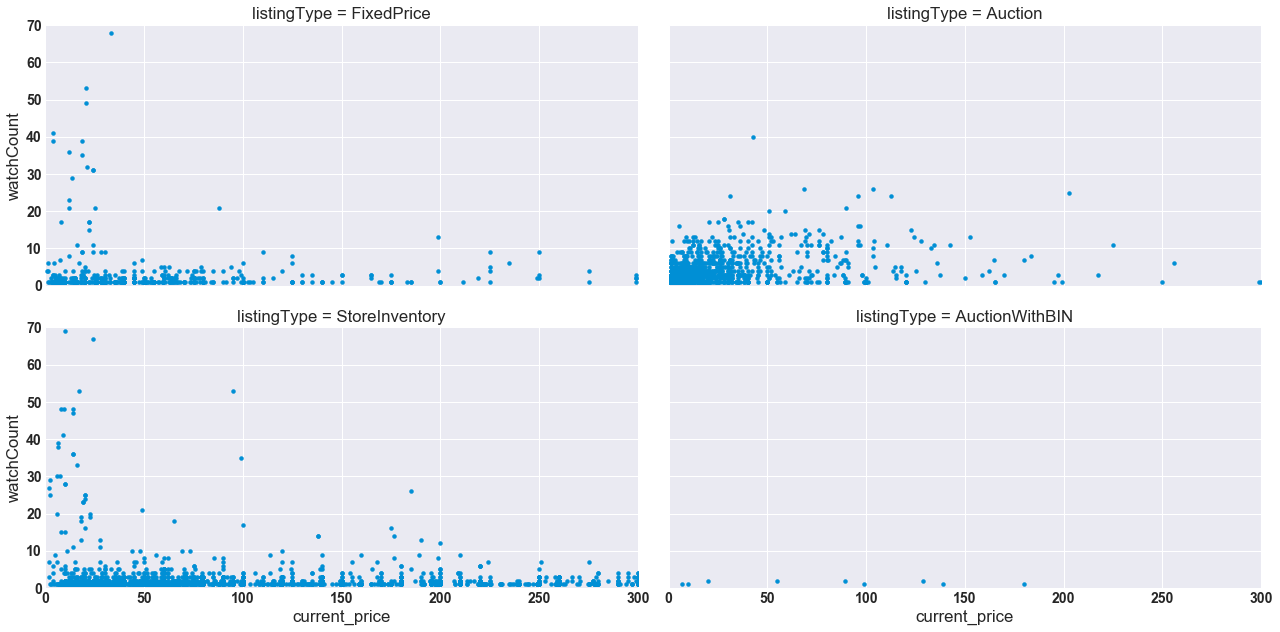

In [84]:
#what is the relationship between watchcount and current price? 
print('Number of Auctions by Listing Type', '\n', df['listingType'].value_counts())
df.pipe(sns.FacetGrid, col='listingType', col_wrap=2,
       aspect=2, size=4.5).map(plt.scatter, 'current_price',
                             'watchCount', s=15)
plt.ylim(0, 70)
plt.xlim(0, 300)
plt.tight_layout()

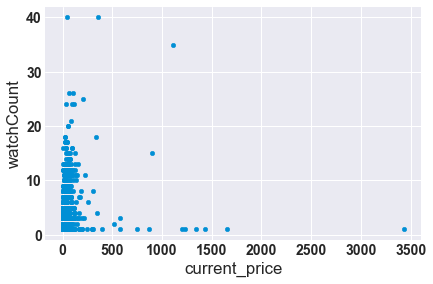

In [85]:
df.loc[df['listingType'] == 'Auction'].plot('current_price', 'watchCount', kind='scatter')

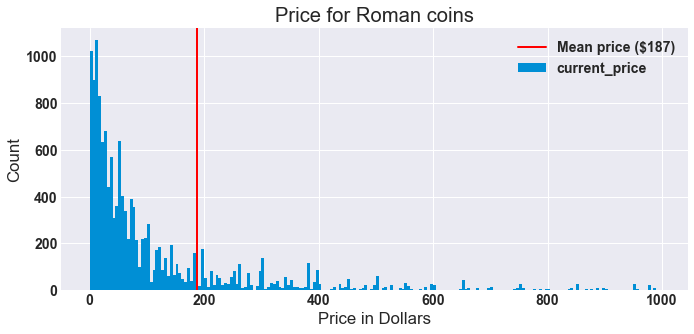

In [86]:
fig, ax = plt.subplots(figsize=(10, 4.5))
bins = np.arange(0, 1000, 5)
ax = ax.hist(df['current_price'], bins=bins)
plt.xlabel('Price in Dollars')
plt.ylabel('Count')
plt.title('Price for Roman coins')
plt.axvline(df['current_price'].mean(), lw=2, c='red', label = 'Mean price ($187)')
plt.legend()

In [87]:
#A massive outlier, representing a rare coin of Emperor Caligula's sisters, with whom he was reported to have had an affair. 
df.loc[df['current_price'] == 40000]

,URLTitle,autoPay,bestOfferEnabled,bidCount,buyItNowAvailable,buyItNowPrice,categoryId,country,currencyid_conv,current_currency,...,productId,returnsNotAccepted,shippingType,shipping_cost,startTime,timeLeft,title,topRatedListing,value_conv,watchCount
1136,CALIGULA-3-Sisters-Sestertius-DRUSILLA-AGRIPPI...,0,1,NaN,0,NaN,4734,US,USD,USD,...,NaN,0,Flat,4.5,2016-03-01 01:15:48,18 days 23:40:46,CALIGULA 3 Sisters Sestertius DRUSILLA AGRIPPI...,1,40000.0,59.0


In [88]:
#293 coins have values greater than 1000 dollars
df.loc[df['current_price'] > 1000]

,URLTitle,autoPay,bestOfferEnabled,bidCount,buyItNowAvailable,buyItNowPrice,categoryId,country,currencyid_conv,current_currency,...,productId,returnsNotAccepted,shippingType,shipping_cost,startTime,timeLeft,title,topRatedListing,value_conv,watchCount
447,VALENTINIAN-GREAT-AV-SOLIDUS-AD-367-375-Authen...,0,0,0.0,0,NaN,4734,US,USD,USD,...,NaN,0,Free,0.00,2018-02-26 05:00:01,3 days 03:25:06,VALENTINIAN THE GREAT AV SOLIDUS (AD 367-375)-...,0,1235.00,1.0
627,roman-coin-constantinius-39-ad-,1,0,NaN,0,NaN,4734,US,USD,USD,...,NaN,1,Free,0.00,2017-06-02 07:50:09,26 days 18:14:31,roman coin constantinius 39 ad,0,4900.00,2.0
628,roman-coin-hadrian-lll-widows-mite-,1,0,NaN,0,NaN,4734,US,USD,USD,...,NaN,1,Free,0.00,2017-06-02 18:55:22,27 days 05:20:20,roman coin hadrian lll widows mite,0,4900.00,4.0
819,GORDIAN-AFRICANUS-238AD-NGC-Certified-Ch-AU-An...,0,1,NaN,0,NaN,4734,US,USD,USD,...,NaN,0,Free,0.00,2017-01-10 21:37:08,4 days 20:02:09,GORDIAN I AFRICANUS 238AD NGC Certified Ch AU ...,1,15000.00,16.0
821,PHILIP-ARAB-1000-Years-Rome-Colosseum-LION-Sil...,0,1,NaN,0,NaN,4734,US,USD,USD,...,NaN,0,Free,0.00,2017-03-15 15:13:34,8 days 13:38:35,PHILIP I the ARAB 1000 Years of Rome Colosseum...,1,1300.00,5.0
835,Antoninus-Pius-Marcus-Aurelius-Caesar-140AD-Ro...,0,1,NaN,0,NaN,4734,US,USD,USD,...,NaN,0,Flat,4.50,2018-01-29 06:27:31,28 days 04:52:32,Antoninus Pius & Marcus Aurelius as Caesar 140...,1,1697.00,NaN
853,Saint-AELIA-FLACILLA-Theodosius-Wife-379AD-Anc...,0,1,NaN,0,NaN,4734,US,USD,USD,...,NaN,0,Flat,4.50,2017-03-26 23:55:41,19 days 22:20:42,Saint AELIA FLACILLA Theodosius I Wife 379AD A...,1,1750.00,1.0
862,PERTINAX-293AD-Rare-Rome-Denarius-NGC-Certifie...,0,1,NaN,0,NaN,4734,US,USD,USD,...,NaN,0,Free,0.00,2016-01-23 03:15:34,11 days 01:40:35,PERTINAX 293AD Rare Rome Denarius NGC Certifie...,1,3900.00,8.0
877,PHILIP-ARAB-247AD-Rome-Authentic-Ancient-Silve...,0,1,NaN,0,NaN,4734,US,USD,USD,...,NaN,0,Flat,4.50,2017-04-01 20:15:25,25 days 18:40:26,PHILIP I the ARAB 247AD Rome Authentic Ancient...,1,1550.00,7.0
881,PHILIP-ARAB-Rome-1000-Year-ELEPHANT-COLOSSEUM-...,0,1,NaN,0,NaN,4734,US,USD,USD,...,NaN,0,Flat,4.50,2018-02-19 04:45:43,19 days 03:10:44,PHILIP I the ARAB Rome 1000 Year ELEPHANT COLO...,1,2197.00,2.0


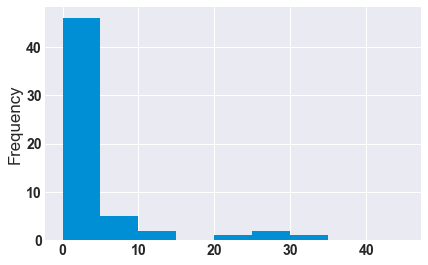

In [89]:
df['watchCount'].value_counts(dropna=False).plot(kind='hist', bins=np.arange(0, 50, 5))

In [90]:
df['shippingType'] = df['shippingType'].apply(lambda x: 'International' if x in ['CalculatedDomesticFlatInternational',
                                                                                'FlatDomesticCalculatedInternational'] else x)

Text(0.5,1,'Coin price by shipping type (Avg. shipping cost above)')

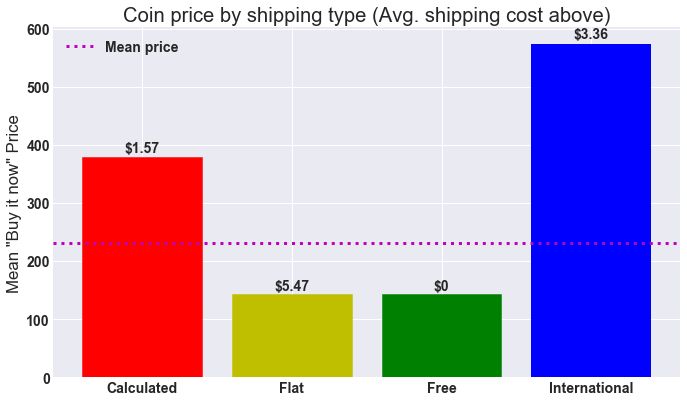

In [91]:
from matplotlib import rc

rc('font', weight='bold')
shipping_graph = df.groupby('shippingType', as_index=False)['buyItNowPrice'].mean()
shipping_graph = shipping_graph.loc[shipping_graph['shippingType'].isin(['Calculated', 'Flat', 'Free', 'International'])]

avg_cost = ['$1.57', '$5.47', '$0', '$3.36']
fig, ax = plt.subplots(figsize=(10, 6))
barlist = plt.bar(shipping_graph['shippingType'], shipping_graph['buyItNowPrice'], 
                  color='blue', )

barlist[0].set_color('r')
barlist[1].set_color('y')
barlist[2].set_color('g')
plt.axhline(df['buyItNowPrice'].mean(), lw=3, c='m', ls='dotted', label='Mean price')
plt.ylabel('Mean "Buy it now" Price')
for num,rect in enumerate(barlist):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                avg_cost[num],
                ha='center', va='bottom',)


plt.legend()
plt.title('Coin price by shipping type (Avg. shipping cost above)')

(0, 500)

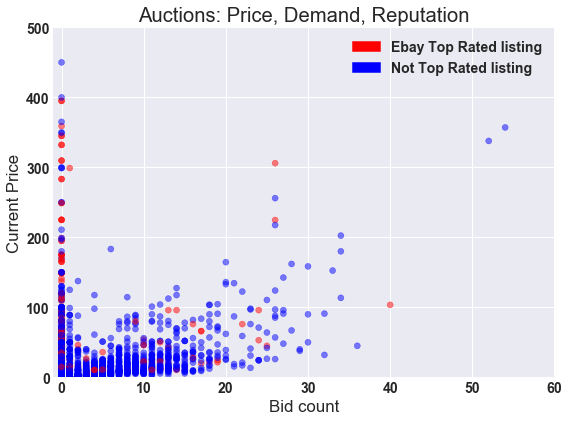

In [92]:
import matplotlib.patches as mpatches
auction_interest = df.loc[df['listingType'] == 'Auction']
rc('font', weight='bold')
plt.subplots(figsize=(8, 6))
plt.scatter(auction_interest['bidCount'], 
            auction_interest['current_price'], c=auction_interest['topRatedListing'].apply(
            lambda x: 'r' if x == 1 else 'b'), alpha=0.5)


legend_patch = mpatches.Patch(color='red', label='Ebay Top Rated listing')
legend_patch2 = mpatches.Patch(color='blue', label='Not Top Rated listing')                            
plt.legend(handles=[legend_patch, legend_patch2])

plt.title('Auctions: Price, Demand, Reputation')
plt.xlabel('Bid count')
plt.ylabel('Current Price')
plt.xlim(-1, 60)
plt.ylim(0, 500)

In [115]:
#pulling individual emperors from titles

#splitting and rejoining URLtitles
df['URLTitle'] = df['URLTitle'].str.split('-').apply(lambda x: " ".join(x))
df['URLTitle'] = df['URLTitle'].str.lower()

roman_emperors = ['Augustus', 'Tiberius', 'Caligula', 'Claudius', 'Nero', 'Galba', 'Otho', 'Aulus Vitellius', 'Vespasian', 'Titus', 
                  'Domitian', 'Nerva', 'Trajan', 'Hadrian', 'Antoninus Pius', 'Marcus Aurelius', 'Lucius Verus', 'Commodus', 'Publius Helvius Pertinax', 
                  'Marcus Didius Severus Julianus', 'Septimius Severus', 'Caracalla', 'Publius Septimius Geta', 'Macrinus', 'Elagabalus', 'Severus Alexander', 
                  'Maximinus', 'Gordian I', 'Gordian II', 'Pupienus Maximus', 'Balbinus', 'Gordian III', 'Philip', 'Decius', 'Hostilian', 'Gallus', 'Aemilian', 'Valerian', 'Gallienus', 
                  'Claudius II Gothicus', 'Quintillus', 'Aurelian', 'Tacitus', 'Florian', 'Probus', 'Carus', 'Numerian', 'Carinus', 'Diocletian', 'Maximian', 'Constantius I',
                  'Galerius', 'Severus', 'Constantine I ', 'Galerius Valerius Maximinus', 'Licinius', 'Constantine II ', 'Constantius II', 'Constans I', 'Gallus Caesar', 'Julian', 'Jovian', 
                  'Valentinian I', 'Valens', 'Gratian', 'Valentinian II', 'Theodosius I', 'Arcadius', 'Magnus Maximus', 'Honorius', 'Theodosius II', 'Constantius III', 'Valentinian III',
                  'Marcian', 'Petronius Maximus', 'Avitus', 'Majorian', 'Anthemius', 'Olybrius', 'Glycerius', 'Julius Nepos', 'Romulus Augustulus', 'Leo I', 'Leo II', 'Zeno']

roman_emperors = [x.lower() for x in roman_emperors]

emperors = []

for title in df['URLTitle']:
    emps = re.findall(r"(?=("+'|'.join(roman_emperors)+r"))",title)
    if emps:
        emperors.append(emps)
    else: 
        emperors.append(np.nan)

df['emperor_in_title'] = emperors

In [129]:
singles = []
multiples = []
for val in df['emperor_in_title']:
    if type(val) != float:
        if len(val) > 1:
            multiples.append(val)
        else:
            singles.append(val)

In [130]:
print(len(singles), len(multiples))

7001 1070


In [138]:
#gold, silver, bronze, orichalcum and copper coinage.
df[df['emperor_in_title'].isnull()].loc[30]['URLTitle']

'026 roman silver coin otacilia severa ar antoninianus rome concordia vf '

In [137]:
df[df['emperor_in_title'].isnull()].loc[30]['title']

'026. Roman Silver Coin. OTACILIA SEVERA. AR Antoninianus. Rome. Concordia. VF'